引入pythunder.tickutils

In [15]:
import pythunder.tickutils as ptu

__DATA_CENTER_ = "http://192.168.3.44:90"

通过tickutils.load_from_data_center函数可以从数据中心(DataCenter)载入我们录制的历史行情数据，至少需要4个参数，第5个参数是可选的

- 参数1：合约名字。可以是一个字符串，也可以是一个list。当取值为字符串是该字符串必须代表一个合约名称，如果是list则其中每一个元素都需要是字符串并且取值为一个合约名字。例如"sfit.future.ag2501"或者\["sfit.future.ag2501", "sfit.future.ag2501"\]。当取值为list时，会同时载入多个合约并将数据进行合并，同时会设置tick的slot取值，该值与合约名称在list中出现的位置保持一致。
- 参数2：起始时间，格式为YYYYMMDD
- 参数3：结束时间（包含），格式为YYYYMMDD
- 参数4：DataCenter地址
- 参数5：tick缓存目录，默认为/tmp。该参数是可选的

In [16]:
ag2501_ticks = ptu.load_from_data_center("sfit.future.ag2501", "20241226", "20241227", __DATA_CENTER_)
print(len(ag2501_ticks))

|████████████████████████████████████████| 2/2 [100%] in 0.6s (3.32/s) 
50126


In [17]:
ag2501_ag2502_ticks = ptu.load_from_data_center(["sfit.future.ag2501","sfit.future.ag2502"], "20241226", "20241227", __DATA_CENTER_)
print(len(ag2501_ag2502_ticks))

|████████████████████████████████████████| 4/4 [100%] in 0.7s (5.90/s) 
182842


通过save_to_file函数可以将数据存储到指定的文件

In [7]:
ptu.save_to_file(ag2501_ag2502_ticks, "/root/ag2501_ag2501.data")

通过load_from_file可以读取磁盘上存储的tick文件

In [8]:
ticks = ptu.load_from_file("/root/ag2501_ag2501.data")
print(len(ticks))

182842


通过align函数生成多个时间戳对齐的tick序列

In [12]:
tick_serials = ptu.align(ag2501_ag2502_ticks)
print(len(tick_serials))

2


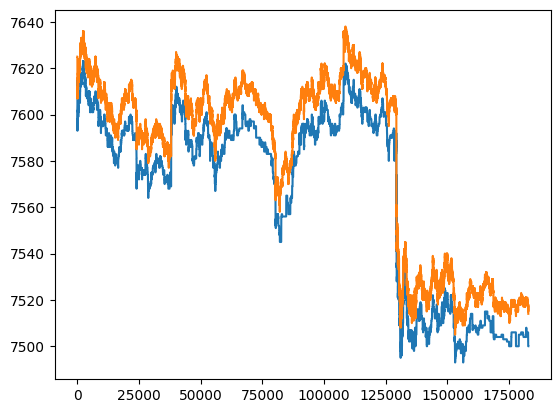

In [14]:
import matplotlib.pyplot as plt
plt.plot([t.last_price for t in tick_serials[0]])
plt.plot([t.last_price for t in tick_serials[1]])